# Sonar Data set

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('dataset_40_sonar.csv')

## Data analysis and preparation

In [5]:
df.shape

(208, 61)

In [6]:
df.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [7]:
df.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

In [8]:
df['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

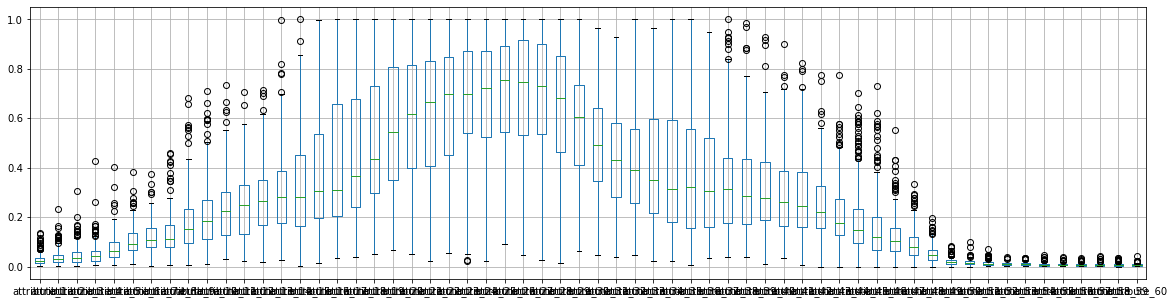

In [11]:
#check for data outliers
%matplotlib inline

df1 = df.drop(['Class'],axis=1)
df1.boxplot(figsize=(20,5))


In [12]:
#check whether scaling is required
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df.Class)
df['Class'].sample(5)

167    0
48     1
116    0
154    0
111    0
Name: Class, dtype: int32

In [14]:
x = df.iloc[:, :60]
y = df.loc[:, ['Class']]

In [15]:
x_col_count = len(x.columns)
x_col_count 

60

In [16]:
# Split data into train-test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (145, 60)
y_train shape: (145, 1)
x_test shape: (63, 60)
y_test shape: (63, 1)


In [17]:
#Build and train the model
import keras
from keras import Sequential
from keras.layers import Flatten, Dense, BatchNormalization, ReLU
from keras import models
from keras import layers

def classifier_model():
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(x_col_count,)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(2, activation='sigmoid')) #Sigmoid is the proper activation function for binary data
    return network

model = classifier_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,194
Trainable params: 16,194
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#Compile model with adam optimizer with a suitable learning rate
lr = 0.008
opt = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07) #epsilon is the error
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1000, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test accuracy: {:.4f}'.format(test_accuracy))

Epoch 1/20
1/1 [==============================] - 0s 383ms/step - loss: 0.7060 - accuracy: 0.5345 - val_loss: 0.8201 - val_accuracy: 0.4138
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 0.7649 - accuracy: 0.4655 - val_loss: 0.6726 - val_accuracy: 0.6552
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: 0.6411 - accuracy: 0.7500 - val_loss: 0.6740 - val_accuracy: 0.5862
Epoch 4/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6548 - accuracy: 0.5517 - val_loss: 0.6709 - val_accuracy: 0.5862
Epoch 5/20
1/1 [==============================] - 0s 29ms/step - loss: 0.6391 - accuracy: 0.5776 - val_loss: 0.6457 - val_accuracy: 0.5517
Epoch 6/20
1/1 [==============================] - 0s 31ms/step - loss: 0.5874 - accuracy: 0.7328 - val_loss: 0.6659 - val_accuracy: 0.6897
Epoch 7/20
1/1 [==============================] - 0s 33ms/step - loss: 0.5832 - accuracy: 0.7241 - val_loss: 0.6535 - val_accuracy: 0.6897
Epoch 8/20
1/1 [==========

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

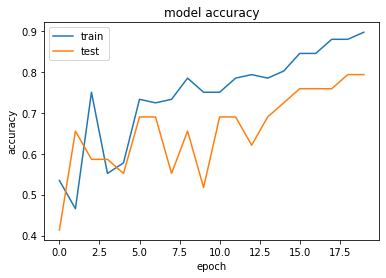

In [21]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

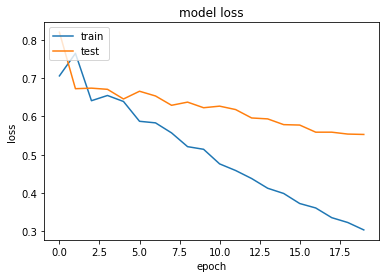

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion
The model accuracy is quite good with around 85% accuracy. 
After around 4 epochs test accuracy is below train accuracy.